# Ejercicio 1:  Proteinas/Levadura

In [1]:
import sys
sys.path.append('/usr/local/lib/python3.5/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import os

In [2]:
# Leemos el archivo
myFolder = (os.getcwd()+'/tc01_data/') # busca en el directorio actual

data1 = pd.read_csv(myFolder+'yeast_Y2H.txt', sep='\t', header=None)
data2 = pd.read_csv(myFolder+'yeast_AP-MS.txt', sep='\t', header=None)
data3 = pd.read_csv(myFolder+'yeast_LIT.txt', sep='\t', header=None)

# Creamos tres grafos vacios
G1 = nx.Graph()
G2 = nx.Graph()
G3 = nx.Graph()

# En cada uno de los grafos agregamos los enlaces: para cada fila, el enlace es de la primera columna a la segunda
# Para acceder a un valor es data[col][fila]
# Guardamos variables con cantidad de nodos y de enlaces de cada grafo

for i in range(len(data1)):
    G1.add_edges_from([(data1[0][i],data1[1][i])])

nodes1 = G1.number_of_nodes()
edges1 = G1.number_of_edges()


for i in range(len(data2)):
    G2.add_edges_from([(data2[0][i],data2[1][i])])

nodes2 = G2.number_of_nodes()
edges2 = G2.number_of_edges()


for i in range(len(data3)):
    G3.add_edges_from([(data3[0][i],data3[1][i])])

nodes3 = G3.number_of_nodes()
edges3 = G3.number_of_edges()


## Comparacion grafica de las redes

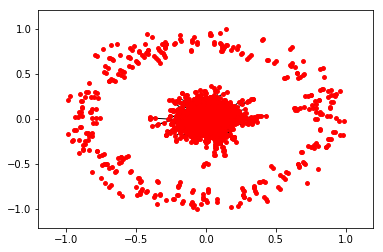

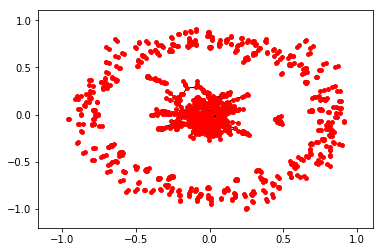

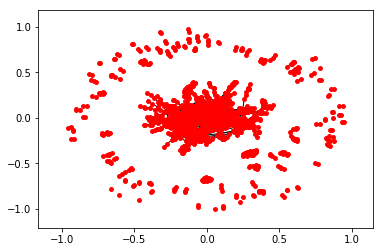

In [9]:
nx.draw_networkx(G1,width=1,node_size=15,with_labels=False) 
plt.show()

nx.draw_networkx(G2,width=1,node_size=15,with_labels=False) 
plt.show()

nx.draw_networkx(G3,width=1,node_size=15,with_labels=False) 
plt.show()

Se puede ver que en los tres casos hay un subgrafo conexo de gran tamaño, y mas subgrafos "perifericos" (por el tipo de layout).

## Caracteristicas de las redes

In [10]:
# El grado medio se puede calcular mediante k_mean=2m/n, donde m es la cantidad de enlaces total y n la cant de nodos
K_mean1 = round(2*float(edges1)/nodes1)
K_mean2 = round(2*float(edges2)/nodes2)
K_mean3 = round(2*float(edges3)/nodes3)

# Uso la funcion degree_histogram que en 'y' pone la frecuencia con la que aparece un cierto grado
a = nx.degree_histogram(G1)
b = nx.degree_histogram(G2)
c = nx.degree_histogram(G3)

# El maximo es el largo que tiene el histograma de grados que hace py
K_max1 = len(a)
K_max2 = len(b)
K_max3 = len(c)

# El minimo es el primer numero no nulo que aparezca en la lista del histograma, para eso uso el iterador next()
# y uso el enumerate() para hacer a la lista a,b,c un iterable
K_min1 = next((i for i, x in enumerate(a) if x!=0), None)
K_min2 = next((i for i, x in enumerate(b) if x!=0), None)
K_min3 = next((i for i, x in enumerate(c) if x!=0), None)

# Densidad de la red uso density(G) (d = numero enlaces/enlaces maximos posibles)
d1 = nx.density(G1)
d2 = nx.density(G2)
d3 = nx.density(G3)

# Coef de clustering medio:
# c_1 = #triangulos con vertice en 1 / triangulos posibles con vertice en 1
# C_mean es el promedio de los c_i sobre todos los nodos de la red
C_mean1 = nx.average_clustering(G1)
C_mean2 = nx.average_clustering(G2)
C_mean3 = nx.average_clustering(G3)

# Clausura transitiva de la red o Global Clustering o Transitividad:
# C_g = 3*nx.triangles(G1) / sumatoria sobre (todos los posibles triangulos)
C_gclust1 = nx.transitivity(G1)
C_gclust2 = nx.transitivity(G2)
C_gclust3 = nx.transitivity(G3)


# Para ver si estaba direccionada existe 'is.directed()'
# Por la forma en que creamos los enlaces, las redes no están dirigidas

# Para calcular el diametro (la maxima longitud) primero hay que encontrar el mayor subgrafo conexo
giant_graph1 = max(nx.connected_component_subgraphs(G1),key=len)
diam1 = nx.diameter(giant_graph1)

giant_graph2 = max(nx.connected_component_subgraphs(G2),key=len)
diam2 = nx.diameter(giant_graph2)

giant_graph3 = max(nx.connected_component_subgraphs(G3),key=len)
diam3 = nx.diameter(giant_graph3)

# Creamos la tabla con las caracteristicas de las redes
haytabla = pd.DataFrame({"Red":["Y2H","AP-MS","LIT"],
                    "Nodos":[nodes1,nodes2,nodes3],
                    "Enlaces":[edges1,edges2,edges3],
                    "K medio":[K_mean1,K_mean2,K_mean3],
                    "K max":[K_max1,K_max2,K_max3],
                    "K min":[K_min1,K_min2,K_min3],
                    "Dirigida":[False,False,False],
                    "Densidad":[d1,d2,d3],
                    "<C_local>":[C_mean1,C_mean2,C_mean3],
                    "C_global":[C_gclust1,C_gclust2,C_gclust3],
                    "Diametro":[diam1, diam2, diam3],
                   })
print (haytabla)


   <C_local>  C_global  Densidad  Diametro  Dirigida  Enlaces  K max  K medio  \
0   0.046194  0.023614  0.001440        14     False     2930     92        3   
1   0.554636  0.618590  0.006899        15     False     9070    128       11   
2   0.292492  0.346193  0.002481        19     False     2925     41        4   

   K min  Nodos    Red  
0      1   2018    Y2H  
1      1   1622  AP-MS  
2      1   1536    LIT  


Se puede ver en la tabla la comparacion de las caracteristicas de cada red. 
Las tres son no-dirigidas por la forma en la que las creamos: a partir de los datos, generamos enlaces de una columna a otra. Consideramos que no tenia sentido que los enlaces sean dirigidos ya que representan interacciones <i>entre</i> proteinas

## Como se crearon las redes: cliques o arboles